In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Read reference image
im1 = cv2.imread('data/image_1.png')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Read image to be aligned
im2 = cv2.imread('data/image_38.png')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

In [26]:
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Detect ORB features and compute descriptors
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Display
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

Text(0.5, 1.0, 'Transformed Image')

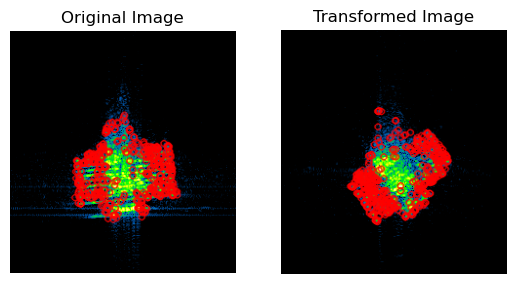

In [27]:
plt.figure()
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title('Original Image')
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title('Transformed Image')

In [28]:
# Match features
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2)

# Sort matches by score
# matches.sort(key=lambda x: x.distance)
matches = sorted(matches, key=lambda x: x.distance)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

(-0.5, 462.5, 249.5, -0.5)

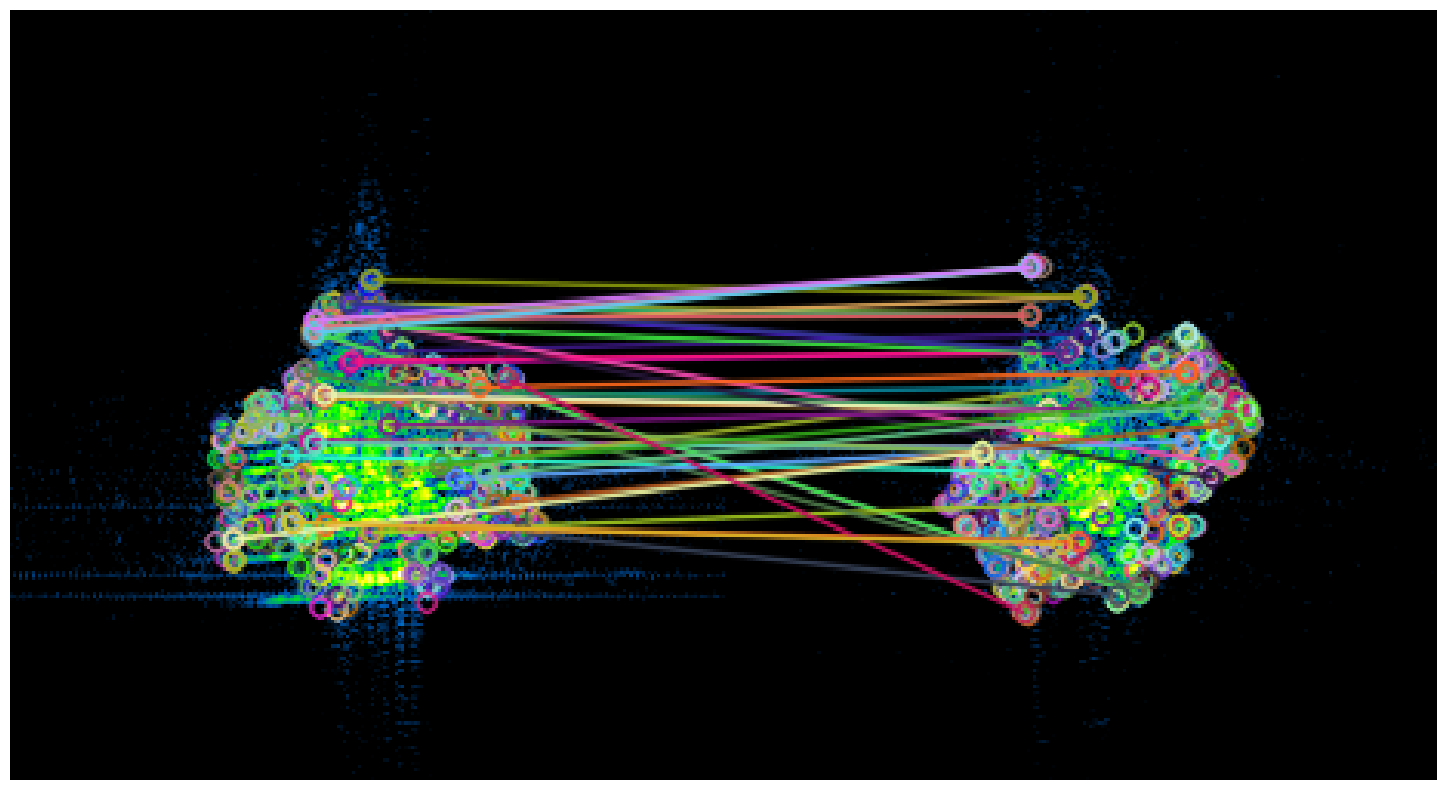

In [29]:
# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches); plt.axis('off')

In [30]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    # trainIdx represents index of keypoint of second set that matches keypoint at match.queryIdx
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Text(0.5, 1.0, 'Transformed image')

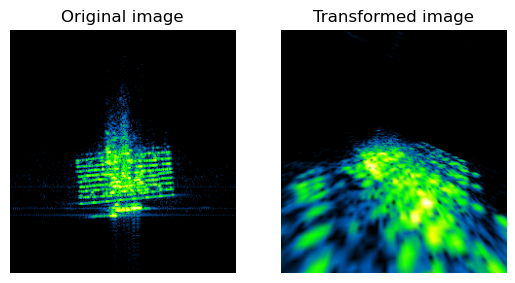

In [31]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Display results
plt.subplot(121); plt.imshow(im1); plt.axis('off'); plt.title('Original image')
plt.subplot(122); plt.imshow(im2_reg); plt.axis('off'); plt.title('Transformed image')